In [60]:
# Importing necessary libraries 

import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

from imblearn.over_sampling import SMOTE

In [61]:
# supress warnings

import warnings
warnings.filterwarnings('ignore')

In [62]:
# Reading csv file
df = pd.read_csv('Telecom Churn Prediction.csv')

In [63]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [64]:
df.drop(['customerID'], axis=1, inplace=True)

In [65]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [66]:
# Define a mapping dictionary

df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})
df['MultipleLines'] = df['MultipleLines'].map({'No': 0, 'Yes': 1, 'No phone service': 2})
df['Contract'] = df['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
df['InternetService'] = df['InternetService'].map({'No': 0, 'DSL': 1, 'Fiber optic': 2})
df['PaymentMethod'] = df['PaymentMethod'].map({'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3})
df['TotalCharges']=df['TotalCharges'].replace({' ': 0})
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

for col in ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']:
    df[col] = df[col].map({'No': 0, 'Yes': 1})
for col in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
    df[col] = df[col].map({'No': 0, 'Yes': 1, 'No internet service': 2})
    

In [67]:
# Displaying first 5 rows
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,2,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,0,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,1,56.95,1889.50,0
2,0,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,0,0,0,0,45,0,2,1,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,1,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70.70,151.65,1


# Splitting data in train and test

In [68]:
# removes the target column from the dataset, leaving only the features
X = df.drop('Churn', axis=1)  
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (5634, 19)
Shape of X_test: (1409, 19)
Shape of y_train: (5634,)
Shape of y_test: (1409,)


# Oversampling of train data

In [69]:
smote = SMOTE(random_state=42)
X_oversampled, y_oversampled = smote.fit_resample(X_train, y_train)
print("Shape of X_oversampled:", X_oversampled.shape)
print("Shape of y_oversampled:", y_oversampled.shape)

Shape of X_oversampled: (8276, 19)
Shape of y_oversampled: (8276,)


# Logistic Regression Model and confusion matrix

In [70]:
# Create a logistic regression model
model = LogisticRegression(max_iter=200)

# Train the model with the training data
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 81.48%


In [71]:
# Accuracy with train data
train_predictions = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print(f"Train accuracy: {train_accuracy * 100:.2f}%")

Train accuracy: 80.24%


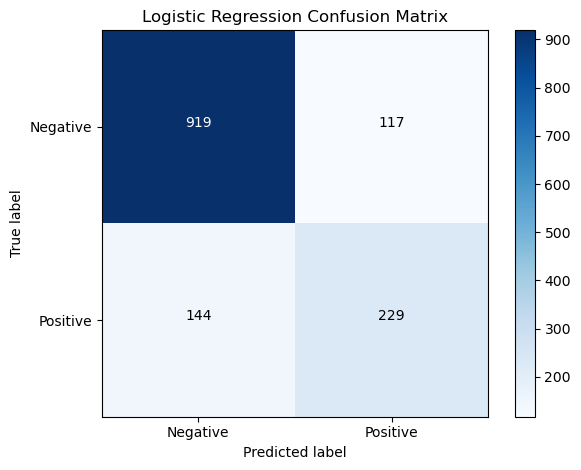

In [72]:
# Logistic Regression confusion matrix
cm = confusion_matrix(y_test, predictions)

# Display the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Logistic Regression Confusion Matrix')
plt.colorbar()
classes = ['Negative', 'Positive']  
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Add numerical values to the plot
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# Decision Tree and confusion matrix

In [73]:
# Initialize the Decision Tree model
clf = DecisionTreeClassifier()

# Train the model with the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
predictions = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 72.53%


In [74]:
# Accuracy with train data
train_predictions = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print(f"Train accuracy: {train_accuracy * 100:.2f}%")

Train accuracy: 80.24%


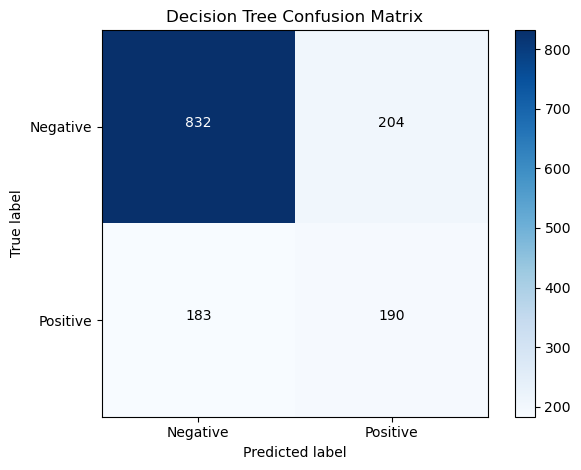

In [75]:
# Decision Tree confusion matrix
cm = confusion_matrix(y_test, predictions)

# Display the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Decision Tree Confusion Matrix')
plt.colorbar()
classes = ['Negative', 'Positive']  
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Add numerical values to the plot
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# Random Forest and confusion matrix

In [76]:
# Initialize the Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees in the forest

# Train the model with the training data
rf_clf.fit(X_train, y_train)

# Make predictions on the test data
predictions = rf_clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 80.41%


In [77]:
# Accuracy with train data
train_predictions = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print(f"Train accuracy: {train_accuracy * 100:.2f}%")

Train accuracy: 80.24%


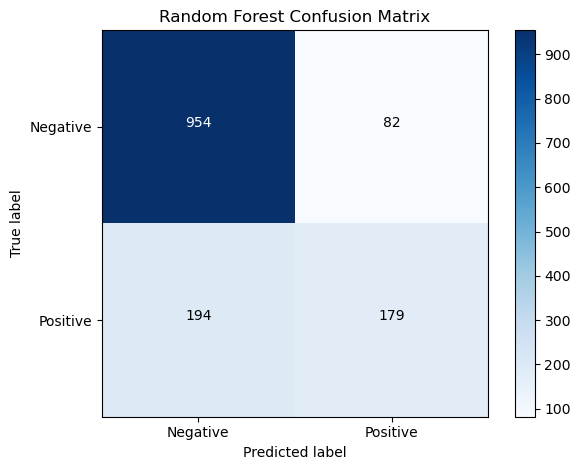

In [78]:
# Random Forest confusion matrix
cm = confusion_matrix(y_test, predictions)

# Display the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Random Forest Confusion Matrix')
plt.colorbar()
classes = ['Negative', 'Positive']  
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Add numerical values to the plot
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# Support Vector Machine (SVM) model and confusion matrix

In [79]:
# Initialize the SVM model
svm_model = SVC()

# Train the model with the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
predictions = svm_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 73.53%


In [80]:
# Accuracy with train data
train_predictions = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print(f"Train accuracy: {train_accuracy * 100:.2f}%")

Train accuracy: 80.24%


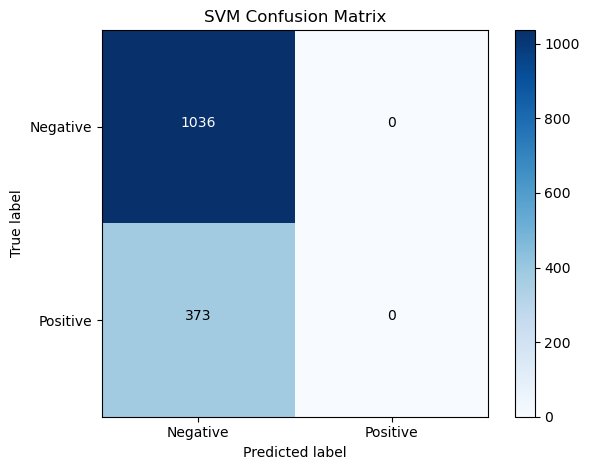

In [81]:
# SVM confusion matrix
cm = confusion_matrix(y_test, predictions)

# Display the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('SVM Confusion Matrix')
plt.colorbar()
classes = ['Negative', 'Positive']  
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Add numerical values to the plot
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()